# Project 2: Sequence Alignment and Phylogeny


   <div class="alert alert-block alert-danger">
    <center>Due: <b>Wednesday, 21 September, 8:59pm</b>.</center> 
   </div>
   
   <div class="alert alert-block alert-warning">
   <center>
       <b>Collaboration and Resource Policy</b>
    </center>
    For this assignment, you are encouraged to work with one other person. Your team must satisfy these constraints:
    
   1. You **did not work together on Project 1**.
   2. You and your partner have a **total number of siblings that is divisible by two** (e.g., if you have one sibling, you need to find a partner with 1, 3, 5, or 7 siblings. If anyone has more than 7 siblings, they can partner with anyone!)
    
We expect most students will have the best learning experience on this assignment by working with a partner, but if you prefer to work alone it is permissible to do this assignment on your own.
    
You are encouraged to discuss these problems with anyone you want, including other students in the class. If you do discuss the specific questions in the assignment with anyone other than your assignment partner and the course staff, though, you should list them in the _External resources used_ section below.
    
You are welcome to use any resources you want for this assignment, other than ones that would defeat the purpose of the assignment. This means you should not look at answers or code from any other students in the class (other than your collaboration with your partner) or from previous offerings of this course, and if you find code that implements the problem you are being asked to do for the assignment, you should not use that code. 

You should document all external resource you use that are not part of the course materials in the _External resources used_ section below.
    </div>

**Team submitting this assignment:**  
<div class="alert alert-success">
    <b><em>list each member of your team here, including both your name and UVA computing id</em></b>
</div>
<div>Jackson Wallace (wjw8jw)</div>

**External resources used:** 
<div class="alert alert-success">
<em>It is not necessary to list the course materials, but if you used any other resources, including discussing problems with students not on your team, list them here.</em>
</div>

<div>https://en.wikipedia.org/wiki/Point_accepted_mutation</div>
<div>https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm</div>
<div>https://en.wikipedia.org/wiki/Neighbor_joining#math_1</div>


 <div class="alert alert-block alert-warning">
    
<b>Submission</b>: Please submit the code you wrote to generate your answers for all parts using this form: https://forms.gle/gv144kv3KRo67uUX7. Your answers should be in the Jupyter Notebook, along with your code. Before submission, you should make a copy of your notebook file with the name uvaid1\_uvaid2.ipynb (where uvaidn is each teammates UVA id) so the submitted file identifies you. You and your partner should submit a single file once together. Submission is due 8:59 pm on Wednesday, 21 September.

## Getting Started

Install basic required packages, should be run only once. You may need to restart the jupyter python kernel (under the Kernel menu) after this. (You can execute this directly in the notebook but running the command below.)

In [114]:
%pip install -r requirements.txt

  Cloning https://github.com/iamgroot42/blosum.git to c:\users\jacks\appdata\local\temp\pip-req-build-2v82uq9q
  Resolved https://github.com/iamgroot42/blosum.git to commit 433ed2f1b55fa010ad1b4b2a84158c1f38ddeaf6
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
Note: you may need to restart the kernel to use updated packages.  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none -q https://github.com/iamgroot42/blosum.git 'C:\Users\jacks\AppData\Local\Temp\pip-req-build-2v82uq9q'
You should consider upgrading via the 'c:\users\jacks\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import blosum as bl
import networkx as nx
import matplotlib.pyplot as plt
import utils
from itertools import chain

## Part 1: Global Sequence Alignment

Below we provide the sequence alignment code from [Class 6](https://computingbiology.github.io/class6/). You are welcome to use and modify this code however you want in your solution, but should answer the questions below based on this provided code.

In [10]:
def simpleMatch(a, b):
    return 1 if a == b else -1

def distanceMatch(a, b):
    return 0 if a == b else -1

def linearGap(n):
    return -1 * n

def alignmentScore(s1, s2, gapPenalty, match):
    if not s1 or not s2:
        return gapPenalty(len(s1)) + gapPenalty(len(s2))
    else:
        return max(gapPenalty(1) + alignmentScore(s1, s2[1:], gapPenalty, match), 
                   gapPenalty(1) + alignmentScore(s1[1:], s2, gapPenalty, match),
                   match(s1[0], s2[0]) + alignmentScore(s1[1:], s2[1:], gapPenalty, match)) 

In [11]:
def alignmentScoreDP(s1, s2, gapPenalty, match):
    m = np.zeros((len(s1) + 1, len(s2) + 1))
    m[0, 0] = 0
    for i in range(1, len(s1) + 1):
        m[i, 0] = gapPenalty(i)
    for j in range(1, len(s2) + 1):
        m[0, j] = gapPenalty(j)
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            m[i, j] = max(gapPenalty(1) + m[i, j - 1],  
                          gapPenalty(1) + m[i - 1, j],    
                          match(s1[i - 1], s2[j - 1]) + m[i - 1, j - 1]) 
    return m
    
def readAlignment(s1, s2, m, gapPenalty, match):
    i = len(s1)
    j = len(s2)
    s1a = ""
    s2a = "" 
    score = 0
    while i > 0 or j > 0:
        if i > 0 and j > 0 and m[i, j] == m[i - 1, j - 1] + match(s1[i - 1], s2[j - 1]):
            i = i - 1
            j = j - 1
            score += match(s1[i], s2[j])
            s1a = s1[i] + s1a
            if s1[i] == s2[j]:
                s2a = s2[j] + s2a
            else:
                s2a = s2[j].lower() + s2a
        elif i > 0 and m[i, j] == m[i - 1, j] + gapPenalty(1):
            i = i - 1
            score += gapPenalty(1)
            s1a = s1[i] + s1a
            s2a = '-' + s2a
        elif j > 0 and m[i, j] == m[i, j - 1] + gapPenalty(1):
            j = j - 1
            score += gapPenalty(1)
            s1a = '-' + s1a
            s2a = s2[j] + s2a
        else:
            assert False
    return (s1a, s2a, score)

def showAlignment(s1, s2, gapPenalty, match):
    m = alignmentScoreDP(s1, s2, gapPenalty, match)
    r = readAlignment(s1, s2, m, gapPenalty, match)
    print (r[0] + "\n" + r[1] + "\n" + str(r[2]))
    return (m, r)

In [12]:
# Example
r = showAlignment("GATT", "GCAT", linearGap, simpleMatch)

G-ATT
GCA-T
1


Here's the version that supports affine gap penalties (from Class 6):

In [13]:
def alignmentScoreDPG(s1, s2, gapPenalty, match):
    m = np.zeros((len(s1) + 1, len(s2) + 1))
    m[0, 0] = 0
    for i in range(1, len(s1) + 1):
        m[i, 0] = gapPenalty(i)
    for j in range(1, len(s2) + 1):
        m[0, j] = gapPenalty(j)
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):         
            m[i, j] = max(chain((gapPenalty(g) + m[i, j - g] for g in range(1, j + 1)),
                                (gapPenalty(g) + m[i - g, j] for g in range(1, i + 1)),   
                                [(match(s1[i - 1], s2[j - 1]) + m[i - 1, j - 1])]))
    return m
    
def readAlignmentG(s1, s2, m, gapPenalty, match):
    i = len(s1)
    j = len(s2)
    s1a = ""
    s2a = ""
    score = 0
    while i > 0 or j > 0:
        if i > 0 and j > 0 and m[i, j] == m[i - 1, j - 1] + match(s1[i - 1], s2[j - 1]):
            i = i - 1
            j = j - 1
            s1a = s1[i] + s1a
            s2a = (s2[j] if s1[i] == s2[j] else s2[j].lower()) + s2a
            score += match(s1[i], s2[j])
        else:
            foundit = False
            for g in range(1, i + 1):
                if m[i, j] == m[i - g, j] + gapPenalty(g):
                    s1a = s1[i - g:i] + s1a
                    s2a = ('-' * g) + s2a
                    i = i - g
                    score += gapPenalty(g)
                    foundit = True
                    break
            if not foundit:
                for g in range(1, j + 1):
                    if m[i, j] == m[i, j - g] + gapPenalty(g):
                        s1a = ('-' * g) + s1a
                        s2a = s2[j - g:j] + s2a
                        j = j - g
                        score += gapPenalty(g)
                        foundit = True
                        break
            assert foundit
    return (s1a, s2a, score)

def showAlignmentG(s1, s2, gapPenalty, match):
    m = alignmentScoreDPG(s1, s2, gapPenalty, match)
    r = readAlignmentG(s1, s2, m, gapPenalty, match)
    print (r[0] + "\n" + r[1] + "\n" + str(r[2]))
    return (m, r)

In [19]:
def affineGap(n, gp = -1, gn = -0.2):
    return gp + (n - 1) * gn

In [20]:
# Example
s1 = "AAAGAATTCA"
s2 = "AAATCA"
r = showAlignmentG(s1, s2, affineGap, simpleMatch)

AAAGAATTCA
AAA----TCA
4.4


<div class="alert alert-success">

**Problem 1 (a).** Run the given algorithm to find a global sequence alignment for the OCA2 genes (a key gene for the production of melanin) for humans and mice with the following gap penalties (still using simpleMatch as the match score function):

  a. `linearGap` penalty
    
  b. `affineGap` penalty, with $gp=-0.2$

  c. `affineGap` penalty, with $gp=-0.1$
    
</div>


In [21]:
human_oca2, mouse_oca2 = utils.load_oca2_sequences()

In [22]:
# Your code here
# a.
linear = showAlignmentG(human_oca2, mouse_oca2, linearGap, simpleMatch)
# b.
def affineGap2(n, gp = -.2, gn = -0.2):
    return gp + (n - 1) * gn

affine_2 = showAlignmentG(human_oca2, mouse_oca2, affineGap2, simpleMatch)
# c.
def affineGap1(n, gp = -.1, gn = -0.2):
    return gp + (n - 1) * gn

affine_1 = showAlignmentG(human_oca2, mouse_oca2, affineGap1, simpleMatch)

-GTTCT--TACTTCGAAG-GCTGTGCTCCG----CTCACCATCCAGAGCGGAGGTGCGGACC-T-TA-AACTCA-CTCC--TGGA----GA-A--AGATCTGCAAGTGC-GCAGAGAGAAGACTGGCAGTGGAGCATGCATCTGGAGGGCAGAGACGGC-A-GGCGGTACCCCGGCGCGCCGGCG-GTGGAGCTCCTGCAGACGTCCGTGCC-CAGCGGACTCGCT-GAACTTGTGGC--CGGCA-AGC
CccTCTGGggCTgC-AAGTGC-cTGCTgaGAAATCTtA-CA-CC--AG-GGttGTGC--tCCATCcACgACTCAGagCCTTTGGATCTGGACACTAGA-CTtC-AcTGCTG--GAGAG-AGA-T--CAG-cGAG--T-CATC---A-GaCAGA-tCaGCAACGG-GG-A--CatGCGC-CtaGaGAacaaAG-aCaT-CAG--G-CtG-GCCTCAGCcG--T-GCTGGAAgTaG-aGCTACacCAGA-C
25
---------G-T-----T-C-T--T---A---CTT-CGA--A-GG-CTGTGCTCC--GCTCAC--CATCCAGAG-C---GGAGGTGC-GGAC-CTTAA-AC-TCACT-CCTGGAGA-AAGATC-TGC-AAGTGC--GCAGA-GAGA--AG--ACTGGCAGTGGAGCAT--GCATCT-G-G-AGGGC-AGAGAC--GGCAGGC-GGTACCC-C-GGCGCG-CCGGCGGTGG-AGCTCCTGCAGACGTCCGTGCCCAGCGGACTCGCTGAACTTGTGGCCGGCAAGC
CCCTCTGGGGCTGCAAGTGCCTGCTGAGAAATCTTAC-ACCAGGGT-TGTGCTCCAT-C-CACGAC-T-CAGAGCCTTTGGA--T-CTGGACACT--AGACTTCACTG-CTGGAGAG-AGATCA-GCG-AGT-CAT-CAGAC-AGATCAGCAAC-G---G-GGA-CATGCGC--CTAGAGAA---CAA-AGACAT--CAGGCTGG---CCT

<div class="alert alert-success">

**Problem 1 (b).** Use the given function to convert these sequences to their amino-acid sequences, and then re-run alignment for all sequences with the default parameters for `affineGap`.
</div>


In [23]:
# Convert sequence of nucleotides to amino acids using codon table lookup
# Example
utils.convert_to_amino("AAATGCGGCGTA")

'KCGV'

In [24]:
# Your code here
# Conversion
amino_human = utils.convert_to_amino(human_oca2)
amino_mouse = mouse_oca2_amino = utils.convert_to_amino(mouse_oca2)

# Alignment
alignment = showAlignmentG(amino_human, amino_mouse, affineGap, simpleMatch)

VLTSKAVLRS-----------PSRAEVRTLNSL----L-----E------KDLQVR----RE----------KTGSGACIWRAETAGGTPARRRWSSCRRPCPADSLNLWPAS
--pSgA--aSAC_EILHQGCAPS-----TtqSLWIWTLDFTAGERSASHQtD-QqRGHAPREQRHQAGLSRA--GS-----RA-----TP--------------D--------
-13.799999999999999


## Part 2: Alignment with Amino-Acids


The PAM<em>n</em> matrix (to be covered in [Class 6](https://computingbiology.github.io/class6/)) represents the likelihood of the occurrence of each tranformation during a time period where there are _n_ total mutation events per 100 amino acids.

<div class="alert alert-success">

**Problem 2 (a)** What would a negative value of an entry in a PAM 1 matrix $M$ indicate? Explain in terms of evolution and functionality of the proteins. Note that $M_{ij} = log(\frac{q_{ij}}{p_ip_j})$ where $q_{ij}$ indicates the frequency of amino acids $i$ and $j$ observed to align in related sequences, and $p_i$ and $p_j$ represent the frequencies of occurrence of $i$ and $j$.
</div>

A negative value of an entry in a PAM 1 matrix M indicates that amino acids i and j are unrelated, and their alignment is likely due to chance. This means that the combination of these amino acids is unlikely to be passed down through evolution.

<div class="alert alert-success">
    
**Problem 2 (b).** The BLOSUM<em>x</em> matices are created by clustering sequences with more than <em>x</em>% similarity into one single sequence and comparing sequences with more than <em>x</em>% divergence. Therefore, BLOSUM matrices are based on local alignments. Which of BLOSUM 50 and 60 contain more evoluationary divergence? 
    
</div>

BLOSUM 50 would contain more evolutionary divergence because it allows for 10% less similarity than BLOSUM 60.

<div class="alert alert-success">

**Problem 2 (c).** Use the BLOSUM62 matrix as your scoring function to perform global alignment on the amino-acid sequences using `linearGap` (default parameters).
</div>

In [25]:
blosum_matrix = bl.BLOSUM(62)

In [26]:
# Your code here

def blosum(a, b):
    return blosum_matrix[str(a)+str(b)]

alignment = showAlignmentG(amino_human, amino_mouse, linearGap, blosum)

---VLTSKA---VL-R--SPSRAEVRTLNSL----LEKDLQVRREKTGSGACIWR-A--ET---AGGTPAR-RR-WS--SCRRPCPADSLNLWPAS
PSGa-aS-AC_EiLHqGCaPS---t-T-qSLWIWTL--Df------T-aGe---RSASHqTDQQrGhaP-REqRHqaGLS--R---AgS-ratP-d
68.0


<div class="alert alert-success">

**Problem 2 (d).** How do your results for Problem 2c differ from the earlier ones of Problem 1a (with `linearGap`)? Which one would you say is more biologically plausible?
</div>

The result from Problem 1a is 25, and the result for sc is 68. I expect the result from Problem 2c to be more biologically plausible because BLOSUM matrices are based on local alignments.

<div class="alert alert-success">

**Problem 2 (e).** We discussed in class that the PAM matrices follow the Markov property and a mismatch at any site depends only on the amino acid at that site and the transition probability. Is this a suitable representation of evolution? Think about if replacements are equaly likely to occur over entire sequences. It may help to consider the difference between PAM and BLOSUM matrices.
</div>

This is not a suitable representation of evolution. Replacements are not equally likely to occur over entire sequences, and BLOSUM accounts for this, so it is a much more accurate representation of evolution.

## Part 3: Local Sequence Alignment


<div class="alert alert-success">
    
<b>Problem 3 (a).</b> Implement local alignment (for both the normal and affine-gap penalties) using the Smith-Waterman algorithm. Feel free to re-use and modify the given Needleman–Wunsch algorithm. 
</div>

In [27]:
def alignmentScoreLocal(s1, s2, gapPenalty, match):
    l1 = len(s1)
    l2 = len(s2)
    m = np.zeros((l1 + 1, l2 + 1))
    m[0, 0] = 0
    for i in range(1, l1 + 1):
        m[i, 0] = 0
    for j in range(1, l2 + 1):
        m[0, j] = 0
    for i in range(1, l1 + 1):
        for j in range(1, l2 + 1):         
            m[i, j] = max(max(chain((gapPenalty(g) + m[i, j - g] for g in range(1, j)), (gapPenalty(g) + m[i - g, j] for g in range(1, i)),   [(match(s1[i - 1], s2[j - 1]) + m[i - 1, j - 1])])),0)
    return m

def readAlignmentLocal(s1, s2, m, gapPenalty, match):
    row, col = np.where(m == np.max(m))
    i = row[0]
    j = col[0]
    s1a = ""
    s2a = ""
    score = 0    
    while (i > 0 or j > 0) and m[i, j] != 0:
        if i > 0 and j > 0 and m[i, j] == m[i - 1, j - 1] + match(s1[i - 1], s2[j - 1]):
            i = i - 1
            j = j - 1
            s1a = s1[i] + s1a
            s2a = (s2[j] if s1[i] == s2[j] else s2[j].lower()) + s2a
            score += match(s1[i], s2[j])
        else:
            foundit = False
            for g in range(1, i + 1):
                if m[i, j] == m[i - g, j] + gapPenalty(g):
                    s1a = s1[i - g:i] + s1a
                    s2a = ('-' * g) + s2a
                    i = i - g
                    score += gapPenalty(g)
                    foundit = True
                    break
            if not foundit:
                for g in range(1, j + 1):
                    if m[i, j] == m[i, j - g] + gapPenalty(g):
                        s1a = ('-' * g) + s1a
                        s2a = s2[j - g:j] + s2a
                        j = j - g
                        score += gapPenalty(g)
                        foundit = True
                        break
            assert foundit
    return (s1a, s2a, score)

def showAlignmentLocal(s1, s2, gapPenalty, match):
    # Although it is often useful to return all high scoring local alignments for an input pair, 
    # it is sufficient if your algorithm just returns the single highest-scoring local alignment 
    # (as shown in the examples below).
    
    # Your code here (implement)
    m = alignmentScoreLocal(s1, s2, gapPenalty, match)
    r = readAlignmentLocal(s1, s2, m, gapPenalty, match)
    print(r[0] + "\n" + r[1] + "\n" + str(r[2]))
    return (m, r)

We've included some assert statements that can help you check the correctness of your algorithm. As with any algorithm, correctness on these test inputs does not guarantee algorithmic correcntess, but can be useful to debug.

In [28]:
# Example expected output
# Taken from https://en.wikipedia.org/wiki/Smith–Waterman_algorithm)
r = showAlignmentLocal("GGTTGACTA", "TGTTACGG", linearGap, simpleMatch)

GTTGAC
GTT-AC
4


In [29]:
# First assert
r = showAlignmentLocal("GGTTGACTA", "TGTTACGG", linearGap, simpleMatch)
assert (r[1][2] == 4 and "GTTGAC" in r[1] and "GTT-AC" in r[1])

# Second assert
r = showAlignmentLocal("GGACTTAAATAGA", "TGTTGGTGATCCACGTGG", linearGap, simpleMatch)
assert (r[1][2] == 2 and "GG" == r[1][0] and "GG" == r[1][1])

# Third assert
r = showAlignmentLocal("TTGA", "GGCC", linearGap, simpleMatch)
assert (r[1][2] == 1 and "G" == r[1][0] and "G" == r[1][1])

# Fourth assert
r = showAlignmentLocal("TACGGGCCCGCTAC", "TAGCCCTATCGGTCA", linearGap, simpleMatch)
assert (r[1][2] == 4 and "TA-CGG" in r[1] and "TATCGG" in r[1])

GTTGAC
GTT-AC
4
GG
GG
2
G
G
1
TA-CGG
TATCGG
4


<div class="alert alert-success">
    
<b>Problem 3 (b).</b> Align the provided hemoglobin genes for:
    <ol>
        <li>`polar bears` & `black bears`,</li>
        <li>`humans` & `chimps`,</li>
        <li>`polar bears` & `humans`, and</li>
        <li>`black bears` & `chimps`.</li>
    </ol>

Use `linearGap`.
    
Take note of the scores you get. What do you notice?
</div>

In [30]:
polar_bear, black_bear, human, chimp = utils.get_hemoglobin_sequences()
print(polar_bear)
print('-----')
print(black_bear)
print('-----')
print(human)
print('-----')
print(chimp)

GGGCATAAATGCTGGCGCACTCCCCGCCCCGCACATTTCTGGTCCTCACAGACTCAGAAAGAAGCCACCATGGTGCTGTCTCCCGCCGACAAGAGCAACGTCAAGGCCACCTGGGATAAGATCGGCAGCCACGCTGGCGAGTATGGCGGCGAGGCTCTGGAGAGGTGAGGACCCAACCTTCCCCTGTCGGGGTCAGGGCTCCGCCACCCCCCCGGCCCTTGTCCTCCACCGCCCACCTAACCCCGGCTCACCCACGCCTTCCTCCCGCAGGACCTTCGCGTCCTTCCCCACCACCAAGACCTACTTCCCCCACTTCGACCTGAGCCCTGGCTCCGCCCAGGTCAAGGCCCACGGCAAGAAGGTGGCCGACGCCCTGACCACCGCCGCAGGCCACCTGGACGACCTGCCGGGCGCCCTGTCCGCTCTGAGCGACCTGCACGCGCACAAGCTGCGAGTGGACCCGGTCAACTTCAAGGTGAGCACGCGGGCCGGCGCGGAGAGACCTGGGGCAGGAGGGCGCAGCGAACCCTGCTAGCAGGACGGGGAGTCCCTTGGGCTGCGGAAGGTGGAGCGCGGGCGGGCGGCCGCGTCCCCCGACGGCCCCTGACGTCCCCTGTCTCCGCAGTTCCTGAGCCACTGCCTGCTGGTGACCCTGGCCAGCCACCACCCCGCGGAGTTCACCCCTGCCGTCCACGCCTCCCTGGACAAGTTCTTCAGCGCCGTGAGCACCGTGCTCACCTCCAAATACCGTTAAGCTGGAGCCGCGCGACCCTCCCGCTCCCGGCCTGGGGCCTCTTGCGCTCCACGCGCCTGAACTTCCCGATCTTTGAATAAAGTCTGAGTGGGCTGCA
-----
AAATGCTGGCGCACTCCCCGCCCCGCACATTTCTGGTCCTCACAGACTCAGAAAGAAGCCACCATGGTGCTGTCTCCCGCCGACAAGAGCAACGTCAAGGCCACCTGGGATAAGATTGGCAGCCACGCTGGCGAGTATGGCG

In [132]:
# Your code here
b1 = showAlignmentLocal(polar_bear, black_bear, linearGap, simpleMatch)
print('-----')
b2 = showAlignmentLocal(human, chimp, linearGap, simpleMatch)
print('-----')
b3 = showAlignmentLocal(polar_bear, human, linearGap, simpleMatch)
print('-----')
b4 = showAlignmentLocal(black_bear, chimp, linearGap, simpleMatch)
print('-----')

AAATGCTGGCGCACTCCCCGCCCCGCACATTTCTGGTCCTCACAGACTCAGAAAGAAGCCACCATGGTGCTGTCTCCCGCCGACAAGAGCAACGTCAAGGCCACCTGGGATAAGATCGGCAGCCACGCTGGCGAGTATGGCGGCGAGGCTCTGGAGAGGTGAGGACCCAACCTTCCCCTGTCGGGGTCAGGGCTCCGCCACCCCCCCGGCCCTTGTCCTCCACCGCCCACCTAACCCCGGCTCACCCACGCCTTCCTCCCGCAGGACCTTCGCGTCCTTCCCCACCACCAAGACCTACTTCCCCCACTTCGACCTGAGCCCTGGCTCCGCCCAGGTCAAGGCCCACGGCAAGAAGGTGGCCGACGCCCTGACCACCGCCGCAGGCCACCTGGACGACCTGCCGGGCGCCCTGTCCGCTCTGAGCGACCTGCACGCGCACAAGCTGCGAGTGGACCCGGTCAACTTCAAGGTGAGCACGCGGGCCGGCGCGGAGAGACCTGGGGCAGGAGGGCGCAGCGAACCCTGCTAGCAGGACGGGGAGTCCCTTGGGCTGCGGAAGGTGGAGCGCGGGCGGGCGGCCGCGTCCCCCGACGGCCCCTGACGTCCCCTGTCTCCGCAGTTCCTGAGCCACTGCCTGCTGGTGACCCTGGCCAGCCACCACCCCGCGGAGTTCACCCCTGCCGTCCACGCCTCCCTGGACAAGTTCTTCAGCGCCGTGAGCACCGTGCTCACCTCCAAATACCGTTAAGCTGGAGCCGCGCGACCCTCCCGCTCCCGGCCTGGGGCCTCTTGCGCTCCACGCGCCTGAACTTCCCGATCTTTGAATAAAGTCTGAGTGGGCTGCA
AAATGCTGGCGCACTCCCCGCCCCGCACATTTCTGGTCCTCACAGACTCAGAAAGAAGCCACCATGGTGCTGTCTCCCGCCGACAAGAGCAACGTCAAGGCCACCTGGGATAAGATtGGCAGCCA--C--GC-----T--------GG--C---

Humans and chimps have a much higher score than any other pair. This score makes sense because humans and chimps are closely related evolutionarily. 

<div class="alert alert-success">

<b>Problem 3 (c).</b> Use <a href="https://blast.ncbi.nlm.nih.gov/">BLAST</a> for the above pairs of sequences. Carefully inspect the returned results to see if they are similar to the alignments you obtained above.
</div>

Blast:

polar bears and black bears: 
    - length: 589
    - score: 619
    - percent ident: 69%
humans and chimps:
    - length: 836
    - score: 1567
    - percent ident: 97%
polar bears and humans:
    - length: 843
    - score: 609
    - percent ident: 75%
black bears and chimps:
    - length: 836
    - score: 106
    - percent ident: 57%
    
These results indicate the same overall trend. Interestingly though, both blast and my results from 3b gave polar bears and humans a higher score than polar bears and black bears.

<div class="alert alert-success">

<b>Problem 3 (d).</b> Could you run an affine-gap-loss version of your local-alignment algorithm for the given sequences? How much time did BLAST take?
Can you think of any optimizations you could make to make the affine-gap-loss version run faster- perhaps utilizing parallel processing or GPUs?
</div>

It is possible to use the affine-gap-loss version for the given sequences but it takes longer. We could poteltially use loop unrolling to make the algorithm run faster although this would not decrease the time complexity. 

## Part 4: Phylogenetic Tree Reconstruction

For this part, we'll briefly enter a fictional setup where you want to trace the evolution of Pokémon. The data is in the format of a two lists: one each for the sequences themselves, and names of the Pokémons.

<div class="alert alert-success">
    
**Problem 4 (a).** Implement an algorithm for Phylogenetic Tree Reconstrution using the neighbor joining algorithm. Color intermediate nodes different from leaf nodes. Use given names as node labels in your visualization.
    
For computing the distances matrix, use affine-based gap-loss in your alignment score computations.
    
</div>

You can either label intermediate nodes in the Phylogenetic tree such that they start with "intermediate_" and use the given functions below, or use your own nomenclature/way of handling those node, and modify the given helper functions accordingly.

We've provided a helper function to plot a given Phylogenetic tree

In [217]:
def construct_alignment(d, names):
    # Your code here (implement)
    G = nx.Graph()
    c = 1
    l = len(d)
    while l > 2:
        verts = list()
        for r in d:
            s = sum(r)/(l-2)
            verts.append(s)  
        m = float("inf")
        temp_i = None
        temp_j = None
        
        # calculate
        for i in range(0, len(verts)):
            for j in range(0, len(verts)):
                if i == j:
                    continue
                temp = d[i][j] - verts[j] - verts[i]
                if temp < m:
                    m = temp
                    temp_i = i
                    temp_j = j    
        if names[temp_j] not in G: 
            G.add_node(names[temp_j])
        if names[temp_i] not in G: 
            G.add_node(names[temp_i])        
        other = "intermediate_" + str(c)        
        if other not in G:
            G.add_node(other)            
        s_i = d[temp_i][temp_j]/2 + (verts[temp_i] - verts[temp_j])/2
        s_j = d[temp_i][temp_j]/2 + (verts[temp_j] - verts[temp_i])/2        
        G.add_edge(other, names[temp_i], weight=s_i)
        G.add_edge(other, names[temp_j], weight=s_j)        
        names.append(other)
        
        # update
        names[temp_i] = None
        names[temp_j] = None
        names = list(filter(None, names))        
        u = np.zeros([len(d), 1])
        for x in range(0, l):
            u[x] = (d[x][temp_i] + d[x][temp_j] - d[temp_i][temp_j]) / 2   
            
        d = np.append(d, u, axis=1)
        u_tp = np.transpose(u)
        u_tp = np.append(u_tp, [[0]], axis=1)
        d = np.append(d, u_tp, axis=0)        
        d = np.delete(d, temp_j, 0)
        d = np.delete(d, temp_j, 1)
        d = np.delete(d, temp_i, 0)
        d = np.delete(d, temp_i, 1)        
        l = len(d)
        c += 1
        
    assert(len(names) == 2)
    G.add_edge(names[0], names[1], weight=d[0][1])
        
    return G
    

In [218]:
def draw_graph_nice(G):
    """
        Helper function to plot a given Phylogenetic tree.
        Assumes intermediate node names start with 'intermediate_'
    """
    nodes = list(G.nodes)
    # Plot intermediate nodes smaller
    sizes = [10 if "intermediate_" in x else 2000 for x in nodes]
    labels = {}    
    for node in nodes:
        if not node.startswith("intermediate_"):
            labels[node] = node
    fig, ax = plt.subplots(figsize=(15,15))
    nx.draw_planar(G, node_size=sizes, with_labels=True, node_color = "#ADD8E6")

Here's the visualization for the given example on Wikipedia to get a sense of what the output should look like. We use `networkx` for creating and managing the graphs.

In [219]:
# Wikipedia example: https://en.wikipedia.org/wiki/Neighbor_joining
distances = np.array([
    [0, 5, 9, 9, 8],
    [5, 0, 10, 10, 9],
    [9, 10, 0, 8, 7],
    [9, 10, 8, 0, 3],
    [8, 9, 7, 3, 0]
], dtype=float)

seq_names = ["a", "b", "c", "d", "e"]
G = construct_alignment(distances, seq_names)

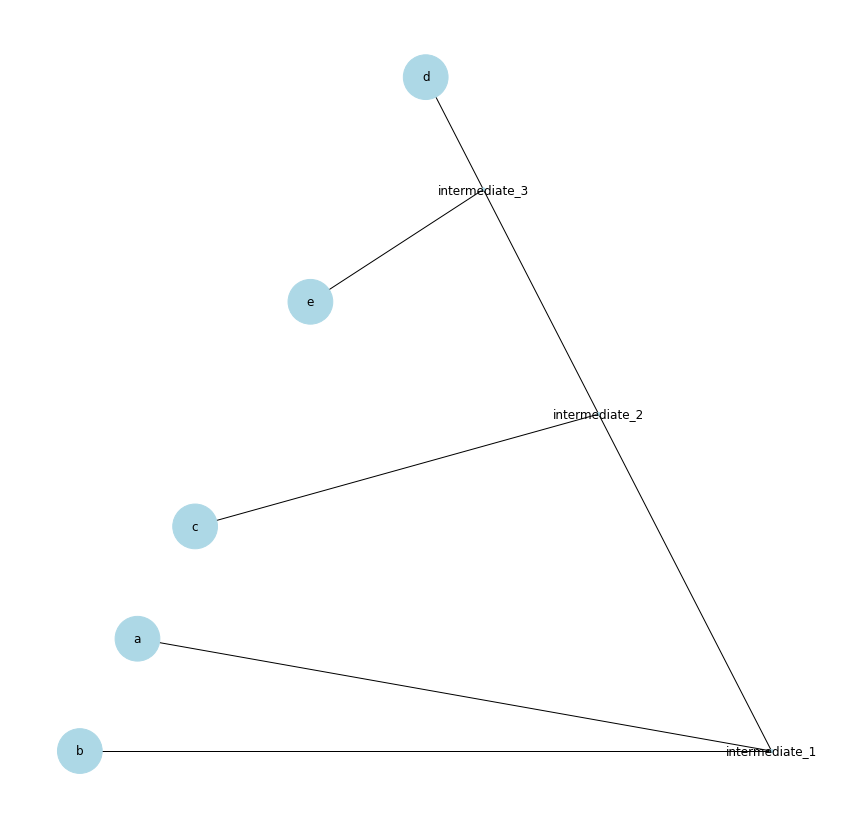

In [220]:
draw_graph_nice(G)

In [221]:
def get_distance_matrix(seqs):
    l = len(seqs)
    m = np.zeros((l, l))
    for i in range(l):
        for j in range(l):
            if i != j:
                m[i][j] = showAlignmentLocal(seqs[i],seqs[j], affineGap, simpleMatch)[1][2]
                m[j][i] = m[i][j]
            else:
                m[i][j] = 0
    return m
# Get sequences
sequences, seq_names = utils.get_sequences_for_ancestry()
matrix = get_distance_matrix(sequences)
G = construct_alignment(matrix, seq_names)

GCACTCTCAGATC-C-TCA--TCTCGTTTCCA--TA
GCgCT-TC-GtTCGCGTaAAGTCcC----CCACCTA
7.999999999999999
CAGATCCTCATCTCG------TTTCCATAGT--TC
CA-AT----ATCTCGGAACCA---CCAcAGTGCTC
9.8
TGCACTCT--CAGATCCTCATCTCGTTTCCA-TAG
TGC---gTGGCAGAaCCT-AaCcCG---aCAGTAG
8.999999999999998
TCAG-ATCCTCAT---CT----CGTTTCC--ATAGT
TCAGCgTCCgC-TAGGCTAAGGCGT----GAAgAGT
7.2
TCAGATC--CTCATC-TCGT----TTCCA
TCcGAcCGACT-AgCTTCGTACACTgCCA
8.2
GCACT-CTCAGAT-CCTCA---TCTCGTTTCCATAGT
GCA-TGCT-A-ATGCCcCAAAGTCTCG---aCA-AGT
12.2
TGCAC-TCTCAGATCCTCATCTCGTT---TC--CATAG
TG-ACGT---AGATCC----C-CGTTGCATCGACA-AG
12.4
TCA--GATCCTCATCTCGT-T-TCCATAGTT
TCAGGGATtgTaAT-TCGTCTGT--AgAGTT
10.600000000000001
CA--GATCCTCATCTCGTT---T--CCATA-----G-TT
CAATGA-----AT--gGTTGAATTGCCATACACGCGCTT
7.3999999999999995
TCCT-CATCTCG----TTTCCATAG
TCCTACcTgTCGCGTCTTT--A-AG
8.2
TGCA-CTCTCAGATCC---TCATCT
TGtAGC---CAaAgCCGAATaATCT
6.199999999999999
GCACTCTCAGATCCT-CA--TCTCGTTTCCATA----GTT
GCA-----AG---CTGCAGGT---GT----A-ACGCGGTT
6.000000000000001
GC-ACTCTCAG-------ATCCT-CAT-

CAGGGATTG-TAATTC------GTCT-GTA-GAGT
CA-----TGCTAATgCCCCAAAGTCTCG-ACaAGT
8.2
TTCGTCTGTAGA-----GTTG
TT-GaC-GTAGATCCCCGTTG
8.2
CA--G---GGATTGTAATT----------CGTCTGTA
CAATGAATGG-TTG-AATTGCCATACACGCG-CT-TA
8.599999999999998
GTTCAGGGATT-GTA-AT-T--CGTCTGT-AG---AGT
GT---GG--TTCcTACcTGTCGCGTCTtTAAGGAAAGT
8.799999999999999
GTT-----C--AG--GGAT--TGTAATT--CG
GTTGTAGCCAAAGCCGaATAATcTAATTAACG
8.399999999999999
AG-TTCAGGGATTGTAATTCGTCTGTAGAGTTG
AGCTgCAGG---TGTAA--CG-C----G-GTTG
11.799999999999999
AGTTCAGGGATT--GTAAT---TCGTC-TGTAGAGTTGGGC
AG--CA---AcTAGGTAATAAATtG-CATGcA-----GGGC
9.0
CAGGGATTGTAATT-----CGTC---TGTAGAGTTG
CAcGcA-TGTtATTATGGCCcTCTATTGTA----TG
9.2
CAATGA-----AT--GGTTGAATTGCCATACACGCGCTT
CA--GATCCTCATCTcGTT---T--CCATA-----G-TT
7.3999999999999995
GTT---G--AATTG----CCA--TACACG
GTTCGCGTAAA--GTCCCCCACCTAC-CG
7.399999999999999
ACAATGAAT---GGTTGAATTGCCA-TACACGCGCT-TA
ACAAT--ATCTCG---GAA---CCACcACA-GtGCTCTA
12.599999999999998
TGGTTGAATTGCCATACACGCG
TGGcaGAA---CC-TA-ACcCG
7.6
CA-CG--CGCT----TAA
CAGC

['Slurpuff', 'Grovyle', 'intermediate_1', 'Snorlax', 'Vaporeon', 'intermediate_2', 'Shaymin', 'Drapion', 'intermediate_3', 'Doduo', 'Beheeyem', 'intermediate_4', 'Dunsparce', 'Ho-Oh', 'intermediate_5', 'intermediate_6', 'Grumpig', 'intermediate_7', 'Stantler', 'intermediate_8', 'intermediate_9', 'Sawsbuck', 'intermediate_10', 'Raichu', 'intermediate_11', 'Toucannon', 'intermediate_12', 'intermediate_13']


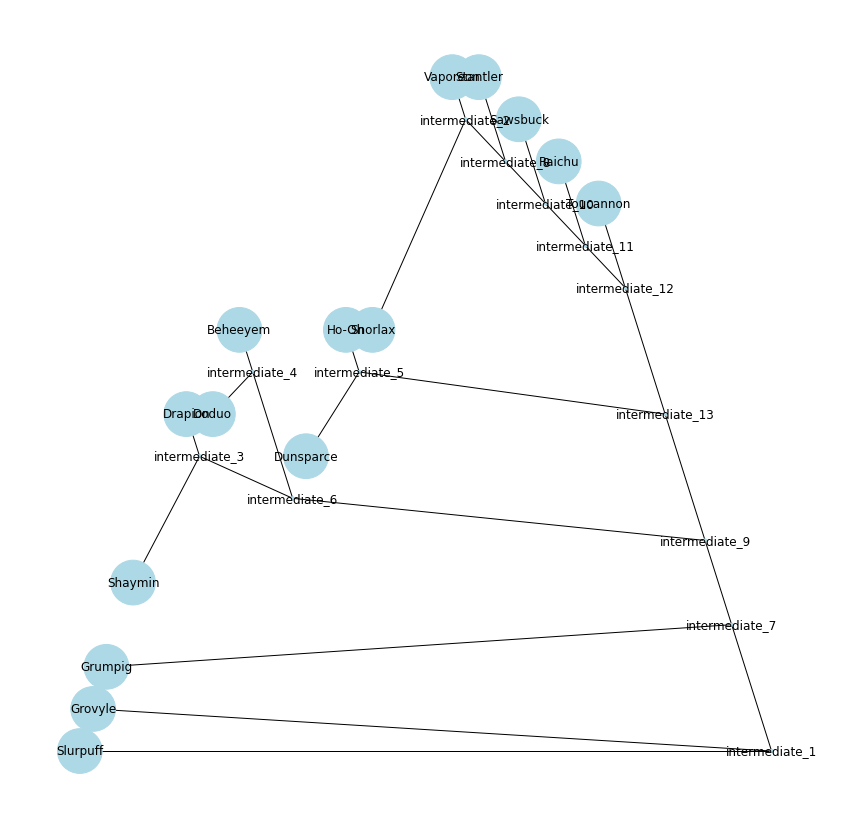

In [223]:
# Your code here
draw_graph_nice(G)
print(list(G.nodes))

<div class="alert alert-success">
    
**Problem 4 (b).** Given $n$ sequences each of roughly the same length $m$, what would the time complexity be for constructing such a phylogenetic tree? Can you think of any algorithms or heuristics that might make the process faster? 
    
</div>

O(n^3)

<div class="alert alert-success">

**Problem 4 (c).** Assume a direct correlation between the distance between any two nodes and the number of years (in millions) between their evolution. Assuming `Grumpig` was the first Pokémon to evolve, when did life first come to be in the fictional scenario?
</div>

<div class="alert alert-warning">

For this part, feel free to use any of `networkx`'s in-built functions (or any graph-specific library you may have chosen for Problem 4).
</div>

In [ ]:
# Your code here

In [31]:
how_long_ago = "???" # Replace with your answer
print(f"Life evolved {how_long_ago} million years ago in the Pokémon world")

Life evolved ??? million years ago in the Pokémon world


One way to test the robustness of such a tree reconstruction algorithm is to consider collection of nodes independently and see if the recontructed sub-trees match the bigger tree.

<div class="alert alert-success">
    
**Problem 4 (d).** Find an  edge between intermediate nodes with the largest weight in the phylogenetic tree and remove that edge- this will produce two disjoint cluster of nodes. Re-run your tree reconstruction algorithm on these two sets of Pokémons. Do your reconstructed tree match the larger phylogenetic tree?
</div>

<div class="alert alert-warning">

For this part, feel free to use any of `networkx`'s in-built functions (or any graph-specific library you may have chosen for Problem 4).
</div>

In [227]:
# Your code here

_Type your answer here_

<div class="alert alert-success">

**Problem 4 (d).** Can you inspect the matrix of distances between the Pokémons and predict whether the reconstructed trees would always be unique? Why/why not?
</div>

_Type your answer here_

## Part 5: Tracing Evolution

<div class="alert alert-warning">
    This problem is a "Challenge Problem". This means it is a problem of unknown difficulty that might be quite challenging (unlike the earlier problems, we don't have a reference solution for this one, or a clear idea how hard it might be). We do hope all students will at least attempt this and that more ambitious students will work hard to solve it and learn interesting things by the attempt (whether or not it is successful), but not get frustrated if you can't get to the desired answer.  As a "Challenge Problem" it means that you shouldn't be worried if you are not able to solve this, though, and you can get full expected credit on this assignment without answering it.
</div>


Now that we can construct Phylogenetic trees using sequence alignment, we can attempt to construct these trees for different organisms and trace their evolution through time. You're given reads processed from a FASTA file for Hemoglobin Beta Proteins, which can be used to then trace evolution based on how similar their sequences are across organisms from different kingdoms. Each record has the following relevant information in Tuple format:

`((uniprot identifier, full name, shortened name, group), (sequence))`

As you may notice, running our nearest-neighbor reconstruction algorithm on this data will give a Phylogenetic tree that does not fully correspond to what we know about the evolution of these species.

<div class="alert alert-success">
    
**Problem 8 (Challenge).** Construct a Phylogenetic Tree using the given sequences. Implement and use any tree-reconstruction method of your choice, and see if it works better than the nearest-neighbor method with a linear-gap penalty.
    
For visualization, use the short name to display in the evolution tree.
    
</div>
    
This is an open-ended question, and is inspired by https://www.mimuw.edu.pl/~lukaskoz/teaching/sad2/lab6/readme.html. You are free to use any approach to deal with the issue. Make sure you provide your code, along with any assumptions you may have.

In [33]:
sequences = utils.get_sequences_for_tree()
print(sequences[0])

(('P01941.1', 'Tupaia glis', 'Tgli', 'Mammalia'), 'VLSPGDKSNIKAAWGKIGGQAPQYGAEALERMFLSFPTTKTYFPHFDMSHGSAQIQAHGKKVADALSTAVGHLDDLPTALSALSDLHAHKLRVDPANFKLLSHCILVTLACHHPGDFTPEIHASLDKFLANVSTVLTSKYR')


In [ ]:
# Your code here

_Write a description of your algorithm, and things you learned from working on this here._

_Type your answer here_

<div class="alert alert-success">
    
Is this (using Hemoglobin proteins) the best way to trace and visualize evolution? Why do you think it is useful, and what could the possible downsides of this be?
    
</div>

_Type your answer here_

   <div class="alert alert-block alert-danger">
    <center>
      
**End of Project 2!**
        
Remember to follow the submission directions above to submit your assignment.
    
 </center>
 </div>